<a href="https://colab.research.google.com/github/Karthik0528/Data-Science---ML/blob/main/CaloriesBurnt-prediction/P5_CaloriesBurntPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cal_df = pd.read_csv('/content/calories.csv')
ex_df = pd.read_csv('/content/exercise.csv')

In [7]:
cal_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [8]:
ex_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [9]:
calories_data = pd.concat([ex_df, cal_df['Calories']], axis=1)

In [10]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [11]:
calories_data.shape

(15000, 9)

In [12]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [13]:
calories_data.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [14]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [15]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

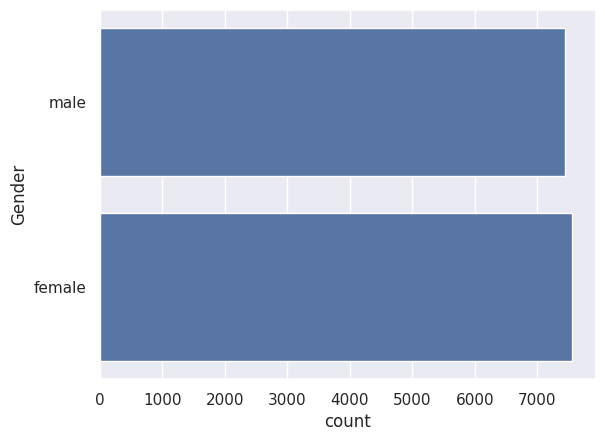

In [16]:
sns.countplot(calories_data['Gender'])


/tmp/ipython-input-1950677799.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

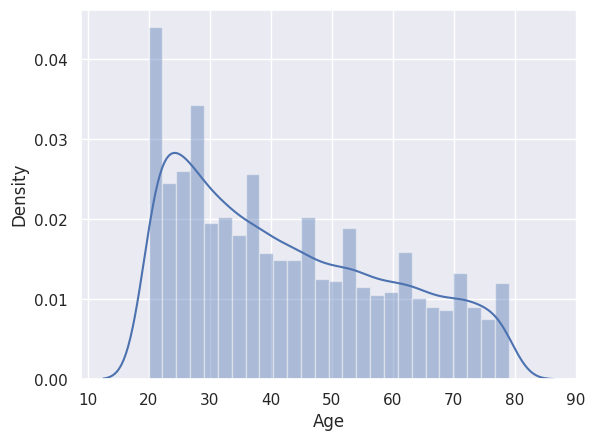

In [17]:
sns.distplot(calories_data['Age'])

/tmp/ipython-input-2430521470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

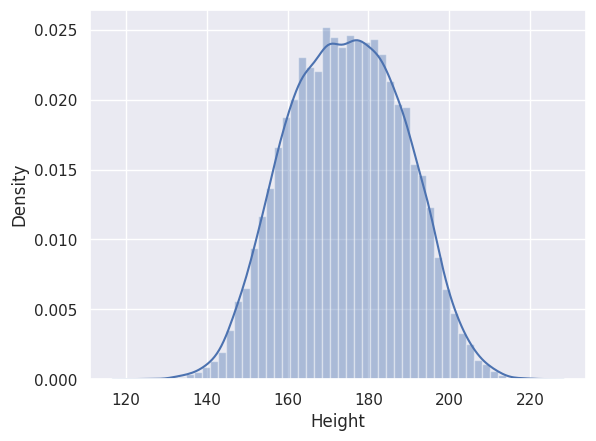

In [18]:
sns.distplot(calories_data['Height'])

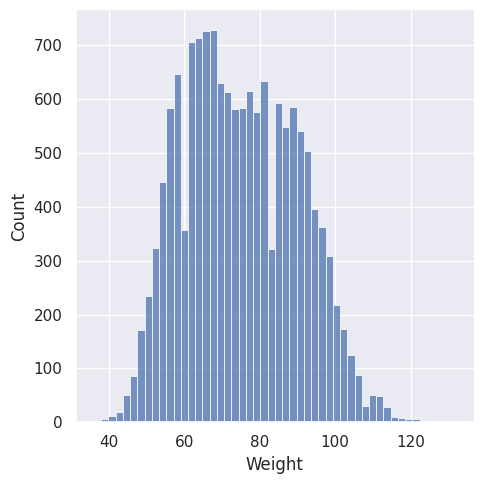

In [19]:
sns.displot(calories_data['Weight'])

In [41]:
correlation = calories_data.corr()

In [42]:
correlation.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421


<Axes: >

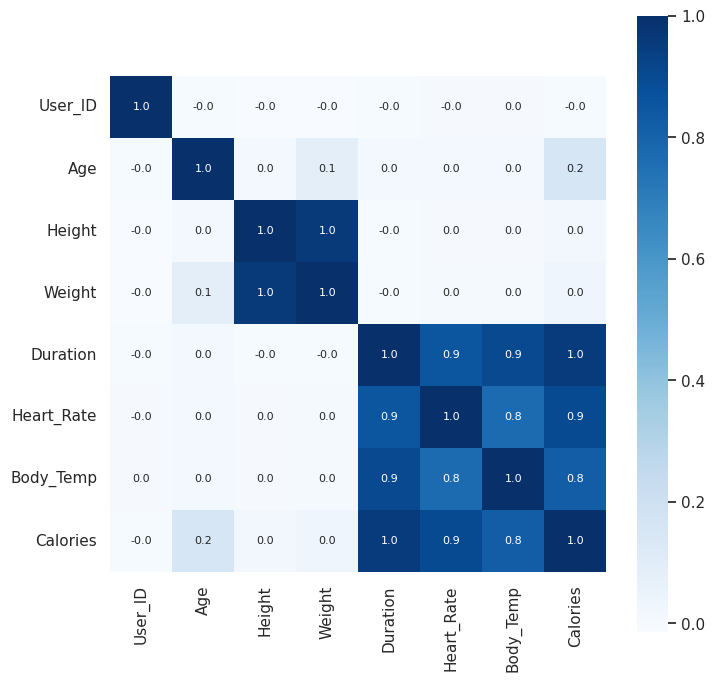

In [43]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True,fmt='.1f', annot =True,annot_kws={'size':8}, cmap ='Blues')

In [44]:
#replacing the gender form from male adn female to 0 and 1 because ML model doesnt undersatdn the text data it can understand only numerical data

In [45]:
calories_data.replace({"Gender":{'male':0,'female':1}},inplace =True)

In [46]:
calories_data.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0


In [47]:
X= calories_data.drop(columns=['User_ID','Calories'],axis=1)
Y= calories_data['Calories']

In [48]:
print(X)
print(Y)

       Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0       68   190.0    94.0      29.0       105.0       40.8
1       20   166.0    60.0      14.0        94.0       40.3
2       69   179.0    79.0       5.0        88.0       38.7
3       34   179.0    71.0      13.0       100.0       40.5
4       27   154.0    58.0      10.0        81.0       39.8
...    ...     ...     ...       ...         ...        ...
14995   20   193.0    86.0      11.0        92.0       40.4
14996   27   165.0    65.0       6.0        85.0       39.2
14997   43   159.0    58.0      16.0        90.0       40.1
14998   78   193.0    97.0       2.0        84.0       38.3
14999   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 6 columns]
0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [49]:
#splitting the data
X_train, X_test, Y_train,Y_test= train_test_split(X, Y, test_size=0.2, random_state=2)

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 6) (12000, 6) (3000, 6)


In [51]:
#Trainig the model
model =XGBRegressor()

In [52]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [53]:
#predicting the test data
test_data_prediction = model.predict(X_test)

In [54]:
print(test_data_prediction)

[127.66284  217.11703   36.980682 ... 146.00682   23.630262  90.783676]


In [55]:
#Finding Mean Absolute Error to find how Big is the error
mae= metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean absolute error:", mae)

Mean absolute error: 2.429606904198726


In [58]:
#making a predicting system
data = (68,	190.0,	94.0,	29.0,	105.0	,40.8)
#converting into numpys
data_as_numpyarray = np.asarray(data)
#reshaping
data_reshaped = data_as_numpyarray.reshape(1,-1)

prediction = model.predict(data_reshaped)
print('Predicted no.of Calories Burned:', prediction[0])

Predicted no.of Calories Burned: 239.46703


Deploying

In [60]:
def load_model(path="model.pkl"):
    model = joblib.load(path)
    return model
